In [128]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import miceforest as mf
import numpy as np

In [154]:
df = pd.read_csv('./dataset/train_preprocessed.csv')
df

,Id,CO2 Emissions(g/km),Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Make,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders
0,1,306.0,8.640000,6.140000,7.514791,FOLD,PICKUP TRUCK - STANDARD,A6,X,3.5,6.0
1,2,283.0,27.270000,30.760000,28.840000,CHEVO,PICKUP TRUCK - STANDARD,A6,E,5.3,NaN
2,3,329.0,1.700000,2.030000,NaN,BMV,SUBCOMPACT,M6,Z,4.4,NaN
3,4,270.0,15.337423,15.900000,NaN,KIO,SUV - SMALL,AS6,X,NaN,4.0
4,5,193.0,20.150000,6.000000,13.800000,BARUSU,MINICOMPACT,NaN,Z,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
137136,137137,275.0,33.710000,7.698229,22.026432,BMV,SUBCOMPACT,AS8,Z,NaN,8.0
137137,137138,166.0,6.489293,0.870000,3.961175,GONDA,STATION WAGON - SMALL,M6,X,1.5,4.0
137138,137139,181.0,2.990000,8.380000,5.412550,NIRRAN,MID-SIZE,AV,X,1.8,4.0
137139,137140,123.0,11.480000,0.221408,6.400000,TOYOTI,COMPACT,NaN,X,1.8,4.0


In [130]:
df.isna().sum()

Id                                     0
CO2 Emissions(g/km)                    0
Fuel Consumption City (L/100Km)     6085
Fuel Consumption Hwy (L/100Km)      6551
Fuel Consumption Comb (L/100Km)     6490
Make                                   0
Vehicle Class                       5132
Transmission                       10440
Fuel Type                           7419
Engine Size(L)                     24333
Cylinders                          20605
dtype: int64

In [131]:
df = df.drop(['Id'], axis=1)

In [132]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_categorical = df.select_dtypes(include=['object'])

In [133]:
df_numerical

,CO2 Emissions(g/km),Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Engine Size(L),Cylinders
0,306.0,8.640000,6.140000,7.514791,3.5,6.0
1,283.0,27.270000,30.760000,28.840000,5.3,NaN
2,329.0,1.700000,2.030000,NaN,4.4,NaN
3,270.0,15.337423,15.900000,NaN,NaN,4.0
4,193.0,20.150000,6.000000,13.800000,3.0,6.0
...,...,...,...,...,...,...
137136,275.0,33.710000,7.698229,22.026432,NaN,8.0
137137,166.0,6.489293,0.870000,3.961175,1.5,4.0
137138,181.0,2.990000,8.380000,5.412550,1.8,4.0
137139,123.0,11.480000,0.221408,6.400000,1.8,4.0


# Numerical Data Imputation

In [134]:
df_fuelconsumption = df[
    [
        "Fuel Consumption City (L/100Km)",
        "Fuel Consumption Hwy (L/100Km)",
        "Fuel Consumption Comb (L/100Km)",
        # "CO2 Emissions(g/km)",
    ]
]

df_enginecylinders = df[
    # ["Engine Size(L)", "Cylinders", "CO2 Emissions(g/km)", "Make", "Vehicle Class"] # with category features
    ["Engine Size(L)", "Cylinders", "CO2 Emissions(g/km)"]
]

# Iterative Imputer

In [135]:
imp = IterativeImputer(random_state=42)
imp.set_output(transform="pandas")
imp.fit(df_fuelconsumption)
df_fuelconsumption_imputed = imp.transform(df_fuelconsumption)

imp = IterativeImputer(random_state=42)
imp.set_output(transform="pandas")
imp.fit(df_enginecylinders)
df_enginecylinders_imputed = imp.transform(df_enginecylinders)

# Or You can Use Mice Forest (LGBM Backend)

In [136]:
# kds = mf.ImputationKernel(
#     df_fuelconsumption, save_all_iterations=True, random_state=100
# )
# kds.mice(10)
# df_fuelconsumption_imputed = kds.complete_data()

# kds = mf.ImputationKernel(
#     df_enginecylinders, save_all_iterations=True, random_state=100
# )
# kds.mice(10)
# df_enginecylinders_imputed = kds.complete_data()

# See imputed data

In [137]:
df_fuelconsumption

,Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km)
0,8.640000,6.140000,7.514791
1,27.270000,30.760000,28.840000
2,1.700000,2.030000,NaN
3,15.337423,15.900000,NaN
4,20.150000,6.000000,13.800000
...,...,...,...
137136,33.710000,7.698229,22.026432
137137,6.489293,0.870000,3.961175
137138,2.990000,8.380000,5.412550
137139,11.480000,0.221408,6.400000


In [138]:
df_fuelconsumption_imputed

,Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km)
0,8.640000,6.140000,7.514791
1,27.270000,30.760000,28.840000
2,1.700000,2.030000,1.848477
3,15.337423,15.900000,15.590609
4,20.150000,6.000000,13.800000
...,...,...,...
137136,33.710000,7.698229,22.026432
137137,6.489293,0.870000,3.961175
137138,2.990000,8.380000,5.412550
137139,11.480000,0.221408,6.400000


In [139]:
df_enginecylinders

,Engine Size(L),Cylinders,CO2 Emissions(g/km)
0,3.5,6.0,306.0
1,5.3,NaN,283.0
2,4.4,NaN,329.0
3,NaN,4.0,270.0
4,3.0,6.0,193.0
...,...,...,...
137136,NaN,8.0,275.0
137137,1.5,4.0,166.0
137138,1.8,4.0,181.0
137139,1.8,4.0,123.0


In [140]:
df_enginecylinders_imputed = df_enginecylinders_imputed.drop(
    ["CO2 Emissions(g/km)"], axis=1
)
df_enginecylinders_imputed

,Engine Size(L),Cylinders
0,3.500000,6.000000
1,5.300000,8.024261
2,4.400000,6.974735
3,2.057097,4.000000
4,3.000000,6.000000
...,...,...
137136,5.023977,8.000000
137137,1.500000,4.000000
137138,1.800000,4.000000
137139,1.800000,4.000000


In [141]:
# there were data < 0, so we need to replace it with 0

df_numerical_imputed = pd.concat([df_fuelconsumption_imputed, df_enginecylinders_imputed], axis=1)
df_numerical_imputed

,Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Engine Size(L),Cylinders
0,8.640000,6.140000,7.514791,3.500000,6.000000
1,27.270000,30.760000,28.840000,5.300000,8.024261
2,1.700000,2.030000,1.848477,4.400000,6.974735
3,15.337423,15.900000,15.590609,2.057097,4.000000
4,20.150000,6.000000,13.800000,3.000000,6.000000
...,...,...,...,...,...
137136,33.710000,7.698229,22.026432,5.023977,8.000000
137137,6.489293,0.870000,3.961175,1.500000,4.000000
137138,2.990000,8.380000,5.412550,1.800000,4.000000
137139,11.480000,0.221408,6.400000,1.800000,4.000000


In [142]:
df_numerical_imputed = df_numerical_imputed.clip(lower=0)

In [143]:
df_numerical_imputed

,Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Engine Size(L),Cylinders
0,8.640000,6.140000,7.514791,3.500000,6.000000
1,27.270000,30.760000,28.840000,5.300000,8.024261
2,1.700000,2.030000,1.848477,4.400000,6.974735
3,15.337423,15.900000,15.590609,2.057097,4.000000
4,20.150000,6.000000,13.800000,3.000000,6.000000
...,...,...,...,...,...
137136,33.710000,7.698229,22.026432,5.023977,8.000000
137137,6.489293,0.870000,3.961175,1.500000,4.000000
137138,2.990000,8.380000,5.412550,1.800000,4.000000
137139,11.480000,0.221408,6.400000,1.800000,4.000000


In [144]:
df_fix1 = df.drop(df_numerical_imputed.columns.tolist(), axis=1)
df_fix1 = pd.concat([df_fix1, df_numerical_imputed], axis=1)
df_fix1

,CO2 Emissions(g/km),Make,Vehicle Class,Transmission,Fuel Type,Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Engine Size(L),Cylinders
0,306.0,FOLD,PICKUP TRUCK - STANDARD,A6,X,8.640000,6.140000,7.514791,3.500000,6.000000
1,283.0,CHEVO,PICKUP TRUCK - STANDARD,A6,E,27.270000,30.760000,28.840000,5.300000,8.024261
2,329.0,BMV,SUBCOMPACT,M6,Z,1.700000,2.030000,1.848477,4.400000,6.974735
3,270.0,KIO,SUV - SMALL,AS6,X,15.337423,15.900000,15.590609,2.057097,4.000000
4,193.0,BARUSU,MINICOMPACT,NaN,Z,20.150000,6.000000,13.800000,3.000000,6.000000
...,...,...,...,...,...,...,...,...,...,...
137136,275.0,BMV,SUBCOMPACT,AS8,Z,33.710000,7.698229,22.026432,5.023977,8.000000
137137,166.0,GONDA,STATION WAGON - SMALL,M6,X,6.489293,0.870000,3.961175,1.500000,4.000000
137138,181.0,NIRRAN,MID-SIZE,AV,X,2.990000,8.380000,5.412550,1.800000,4.000000
137139,123.0,TOYOTI,COMPACT,NaN,X,11.480000,0.221408,6.400000,1.800000,4.000000


# Categorical Imputation

<Axes: xlabel='Fuel Type'>

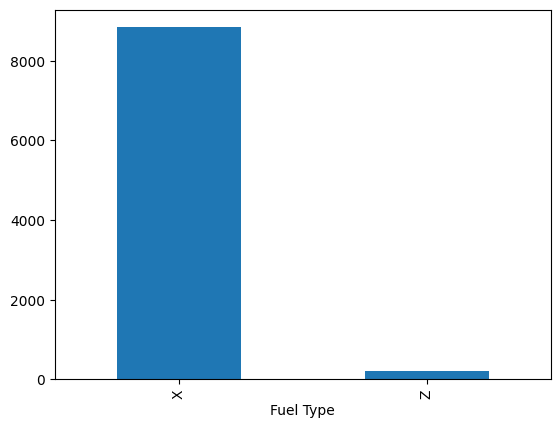

In [145]:
# Make class determines what kind of fuel type and transmission type

df_temp = df.loc[df["Make"] == "TOYOTI"]
df_temp['Fuel Type'].value_counts().plot(kind='bar')

In [146]:
# take features to be used for imputation

df_categorical_imputed = df_fix1[
    [
        "Make",
        "Vehicle Class",
        "Transmission",
        "Fuel Type",
        "CO2 Emissions(g/km)",
        "Engine Size(L)",
        "Cylinders",
    ]
]

In [147]:
for col in df_categorical_imputed.columns:
    if df_categorical_imputed[col].dtype == "object":
        df_categorical_imputed[col] = df_categorical_imputed[col].astype("category")

C:\Users\sesar\AppData\Local\Temp\ipykernel_8848\4080648257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical_imputed[col] = df_categorical_imputed[col].astype("category")
C:\Users\sesar\AppData\Local\Temp\ipykernel_8848\4080648257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical_imputed[col] = df_categorical_imputed[col].astype("category")
C:\Users\sesar\AppData\Local\Temp\ipykernel_8848\4080648257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [148]:
df_categorical_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137141 entries, 0 to 137140
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Make                 137141 non-null  category
 1   Vehicle Class        132009 non-null  category
 2   Transmission         126701 non-null  category
 3   Fuel Type            129722 non-null  category
 4   CO2 Emissions(g/km)  137141 non-null  float64 
 5   Engine Size(L)       137141 non-null  float64 
 6   Cylinders            137141 non-null  float64 
dtypes: category(4), float64(3)
memory usage: 3.7 MB


In [149]:
# might consider "UserWarning: [Transmission,Fuel Type] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities."

kds = mf.ImputationKernel(
    df_categorical_imputed, save_all_iterations=True, random_state=42
)
kds.mice(10)
df_categorical_imputed = kds.complete_data()

df_categorical_imputed

c:\Users\sesar\Documents\_PROJECTS\bebass\venv31011\lib\site-packages\miceforest\ImputationKernel.py:370: UserWarning: [Transmission,Fuel Type] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(


,Make,Vehicle Class,Transmission,Fuel Type,CO2 Emissions(g/km),Engine Size(L),Cylinders
0,FOLD,PICKUP TRUCK - STANDARD,A6,X,306.0,3.500000,6.000000
1,CHEVO,PICKUP TRUCK - STANDARD,A6,E,283.0,5.300000,8.024261
2,BMV,SUBCOMPACT,M6,Z,329.0,4.400000,6.974735
3,KIO,SUV - SMALL,AS6,X,270.0,2.057097,4.000000
4,BARUSU,MINICOMPACT,AS6,Z,193.0,3.000000,6.000000
...,...,...,...,...,...,...,...
137136,BMV,SUBCOMPACT,AS8,Z,275.0,5.023977,8.000000
137137,GONDA,STATION WAGON - SMALL,M6,X,166.0,1.500000,4.000000
137138,NIRRAN,MID-SIZE,AV,X,181.0,1.800000,4.000000
137139,TOYOTI,COMPACT,AV,X,123.0,1.800000,4.000000


In [ ]:
df_categorical_impupted_fix = df_categorical_imputed.copy()
df_categorical_impupted_fix = df_categorical_impupted_fix.drop(
    [
        "CO2 Emissions(g/km)",
        "Engine Size(L)",
        "Cylinders",
    ], axis=1
)

In [152]:
df_fix2 = df_fix1.drop(df_categorical_impupted_fix.columns.tolist(), axis=1)
df_fix2 = pd.concat([df_fix2, df_categorical_impupted_fix], axis=1)
df_fix2

,CO2 Emissions(g/km),Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Engine Size(L),Cylinders,Make,Vehicle Class,Transmission,Fuel Type
0,306.0,8.640000,6.140000,7.514791,3.500000,6.000000,FOLD,PICKUP TRUCK - STANDARD,A6,X
1,283.0,27.270000,30.760000,28.840000,5.300000,8.024261,CHEVO,PICKUP TRUCK - STANDARD,A6,E
2,329.0,1.700000,2.030000,1.848477,4.400000,6.974735,BMV,SUBCOMPACT,M6,Z
3,270.0,15.337423,15.900000,15.590609,2.057097,4.000000,KIO,SUV - SMALL,AS6,X
4,193.0,20.150000,6.000000,13.800000,3.000000,6.000000,BARUSU,MINICOMPACT,AS6,Z
...,...,...,...,...,...,...,...,...,...,...
137136,275.0,33.710000,7.698229,22.026432,5.023977,8.000000,BMV,SUBCOMPACT,AS8,Z
137137,166.0,6.489293,0.870000,3.961175,1.500000,4.000000,GONDA,STATION WAGON - SMALL,M6,X
137138,181.0,2.990000,8.380000,5.412550,1.800000,4.000000,NIRRAN,MID-SIZE,AV,X
137139,123.0,11.480000,0.221408,6.400000,1.800000,4.000000,TOYOTI,COMPACT,AV,X


In [159]:
df_id = df["Id"]
df_fix2.insert(0, "Id", df_id)
df_fix2.to_csv("./dataset/train_preprocessed_imputed_unpreprocessed.csv", index=False)